# 5팀 _ PTJ
#### 팀원 : 남승현, 원광연, 임세홍, 최예준, 김수진

### 분석 목적 : 휘발유 가격에 미치는 요소 분석

|분석 요소|분석 내용|
|--------------------|---------------|
|분석1|테스트2|
|분석2|테스트2|
|분석3|테스트2|
|분석4|테스트2|
|분석5|테스트2|
    

### 1. 데이터 불러오기

In [1]:
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
seoul_first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv',encoding='cp949')
seoul_first
seoul_second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv',encoding='cp949')
seoul_second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202007~202012),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


In [4]:
seoul=pd.concat([seoul_first,seoul_second])[1:]
seoul
# seoul.info()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)





<ipython-input-4-0ab17fdcf4c8>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
seoul['시'] = seoul['지역'].str.split(" ").str[0]
seoul['구'] = seoul['지역'].str.split(" ").str[1]
seoul['월'] = seoul['기간'].str.split(" ").str[1]
seoul.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,월
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,서울,강남구,01월
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,서울,강남구,02월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,서울,강남구,03월
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,서울,강남구,04월
5,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0,서울,강남구,05월


In [6]:
# 상표별 가격 ex) 같은 상표별 지역에 따른 가격 차이, 같은 지역의 다른 상표별 가격 차이
seoul.pivot_table('휘발유',index=['상표'],aggfunc='mean').sort_values('휘발유', ascending=False)

,휘발유
상표,
SK에너지,1517.494476
GS칼텍스,1480.077478
S-OIL,1434.653561
현대오일뱅크,1427.582881
자가상표,1414.056800
알뜰주유소,1355.216043
알뜰(ex),1330.236667


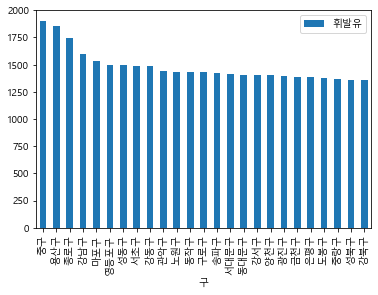

<Figure size 2160x720 with 0 Axes>

In [7]:
# 지역별 가격 ex) 다른 구에 위치한 같은 주유소의 가격 
seoul.pivot_table('휘발유',index=['구'],aggfunc='mean').sort_values('휘발유',ascending=False).plot(kind='bar')
plt.figure(figsize=(30, 10))
plt.show()

<AxesSubplot:>

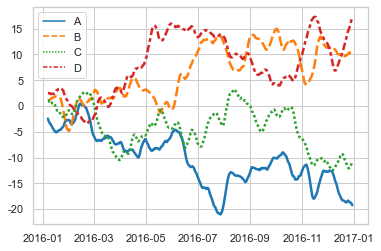

In [8]:
# 기간별 가격 ex) 기간별 전체 주유소의 가격/광연
#seoul.pivot_table('휘발유',index=['기간'],aggfunc='mean')
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [9]:
# 기간별+지역 ex)  기간별 다른 지역의 동일한 상호 가격, 기간별 같은 지역의 다른 상호 가격 / 승현
seoul_loc = seoul.pivot_table(values='휘발유',index=['구'],columns=['월'],aggfunc='mean')
seoul_loc.head()

월,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
구,,,,,,,,,,,,
강남구,1771.252750,1754.086750,1703.356500,1580.068250,1504.057250,1540.887000,1569.828250,1574.318750,1554.379744,1550.467436,1543.167368,1564.309211
강동구,1646.620000,1618.855625,1556.316250,1419.257500,1355.564375,1423.028750,1466.495625,1472.664375,1475.308750,1455.615000,1442.685625,1467.394375
강북구,1538.201538,1513.650000,1438.353846,1270.588462,1216.083846,1312.159231,1354.995385,1357.291538,1345.636154,1313.496923,1282.606923,1353.686154
강서구,1589.972941,1561.463235,1482.930000,1345.198529,1289.162941,1361.172059,1389.361818,1391.417273,1382.606061,1359.710909,1340.857879,1396.406970
관악구,1607.645000,1587.043750,1534.165000,1406.089375,1315.498750,1378.938750,1419.215000,1419.962500,1417.950588,1402.724375,1385.651875,1415.713750


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-pa

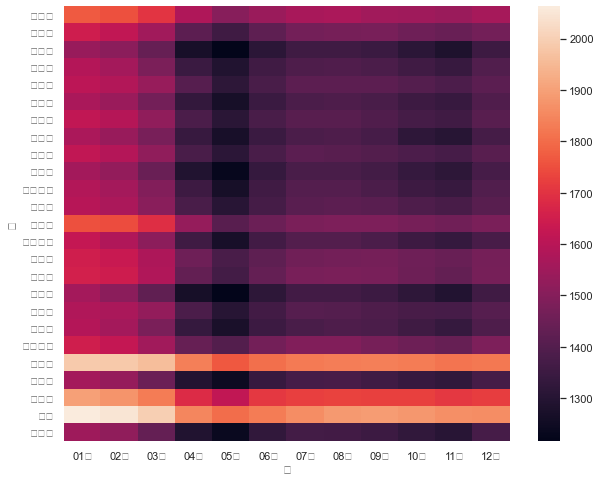

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(seoul_loc)
plt.show()

ValueError: Could not interpret value `월` for parameter `x`

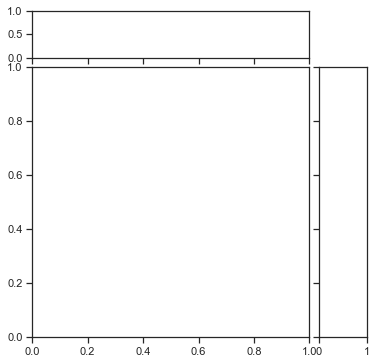

In [11]:
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=seoul_loc, x="월", y="구", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [ ]:
# 상표별+기간 ex) 기간별 상표에 따른 가격/수진
seoul.pivot_table('휘발유',index=['상표','기간'],aggfunc='mean')

In [ ]:
# 지역+상표 가격 차이/ 세홍
seoul.pivot_table('휘발유',index=['지역','상표'],aggfunc='mean')

In [ ]:
# 상표별 가격 순위 (10)
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
#df.groupby(['Gender'])['Silver'].agg('sum')
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
seoul_1=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=False).head(10)
seoul_1

In [ ]:
# 지역별 가격 낮은 순위 (10)
seoul_2=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=True).head(10)
seoul_2